# Исследование объявлений о продаже квартир

**Заказчик**: менеджеры проекта Яндекс.Недвидимость.

**Цель проекта**: выяснить какие факторы влияют на формирование рыночной цены на недвижимость в Санкт-Петербурге и соседних населённых пунктах.

**Входные данные**: данные сервиса Яндекc.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных: Первая группа данных вписана пользователем, вторая - получена автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Результаты исследования позволят построить автоматизированную систему по контролю за данными: она отследит аномалии и мошенническую деятельность. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Вывод-общей-информации-о-файле" data-toc-modified-id="Вывод-общей-информации-о-файле-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод общей информации о файле</a></span></li><li><span><a href="#Вывод-по-главе" data-toc-modified-id="Вывод-по-главе-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по главе</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-общей-информации-о-пропусках" data-toc-modified-id="Вывод-общей-информации-о-пропусках-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод общей информации о пропусках</a></span></li><li><span><a href="#Проверка-на-дубли" data-toc-modified-id="Проверка-на-дубли-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубли</a></span></li><li><span><a href="#Проверка-на-явные-дубликаты-и-корректность-названия-колонок" data-toc-modified-id="Проверка-на-явные-дубликаты-и-корректность-названия-колонок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на явные дубликаты и корректность названия колонок</a></span></li><li><span><a href="#Вывод-по-главе" data-toc-modified-id="Вывод-по-главе-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод по главе</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Добавление-данных-о-цене-квадратного-метра,-дня-недели,-месяца-и-года-публикации" data-toc-modified-id="Добавление-данных-о-цене-квадратного-метра,-дня-недели,-месяца-и-года-публикации-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление данных о цене квадратного метра, дня недели, месяца и года публикации</a></span></li><li><span><a href="#Добавление-категоризации-этажей-и-соотношения-площадей-внутри-квартир" data-toc-modified-id="Добавление-категоризации-этажей-и-соотношения-площадей-внутри-квартир-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление категоризации этажей и соотношения площадей внутри квартир</a></span></li><li><span><a href="#Изучение-параметров-квартир" data-toc-modified-id="Изучение-параметров-квартир-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение параметров квартир</a></span></li><li><span><a href="#Изучение-времени-продажи-квартир" data-toc-modified-id="Изучение-времени-продажи-квартир-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение времени продажи квартир</a></span></li><li><span><a href="#Выявление-зависимости-цены-от-близости-к-центру" data-toc-modified-id="Выявление-зависимости-цены-от-близости-к-центру-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выявление зависимости цены от близости к центру</a></span></li><li><span><a href="#Выявление-зависимости-продаж-от-дня/месяца/года" data-toc-modified-id="Выявление-зависимости-продаж-от-дня/месяца/года-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выявление зависимости продаж от дня/месяца/года</a></span></li><li><span><a href="#Изучение-влияния-на-цену-площади-квартир,-числа-комнат-и-этажности" data-toc-modified-id="Изучение-влияния-на-цену-площади-квартир,-числа-комнат-и-этажности-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Изучение влияния на цену площади квартир, числа комнат и этажности</a></span></li><li><span><a href="#Изучение-влияния-города-на-цену" data-toc-modified-id="Изучение-влияния-города-на-цену-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Изучение влияния города на цену</a></span></li><li><span><a href="#Вывод-по-главе" data-toc-modified-id="Вывод-по-главе-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Вывод по главе</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных

Загрузим библиотеки и файл с данными:

### Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных:**

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м);
- **balcony** — число балконов;
- **ceiling_height** — высота потолков (м);
- **cityCenters_nearest** — расстояние до центра города (м);
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия);
- **first_day_exposition** — дата публикации;
- **floor** — этаж;
- **floors_total** — всего этажей в доме;
- **is_apartment** — апартаменты (булев тип);
- **kitchen_area** — площадь кухни в квадратных метрах (м²);
- **last_price** — цена на момент снятия с публикации;
- **living_area** — жилая площадь в квадратных метрах (м²);
- **locality_name** — название населённого пункта;
- **open_plan** — свободная планировка (булев тип);
- **parks_around3000** — число парков в радиусе 3 км;
- **parks_nearest** — расстояние до ближайшего парка (м);
- **ponds_around3000** — число водоёмов в радиусе 3 км;
- **ponds_nearest** — расстояние до ближайшего водоёма (м);
- **rooms** — число комнат;
- **studio** — квартира-студия (булев тип);
- **total_area** — площадь квартиры в квадратных метрах (м²);
- **total_images** — число фотографий квартиры в объявлении.

### Вывод общей информации о файле

Выведем общую информаци о файле:

In [2]:
df.info()
#выведем полную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод по главе

Первым шагом мы открыли файл с предоставленными данными, вывели первые 10 строк и визуально с ними ознакомились. Данных много, расшифровка каждой колонки у нас есть, в глаза бросается большое количество пропусков в данных, которые мы изучим на этапе предобработки данных.

## Предобработка данных

### Вывод общей информации о пропусках

Узнаем в каких столбцах могут встречаться пропуски в значениях:

In [3]:
df.isna().sum()
#смотрим количество пропусков по столбцам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

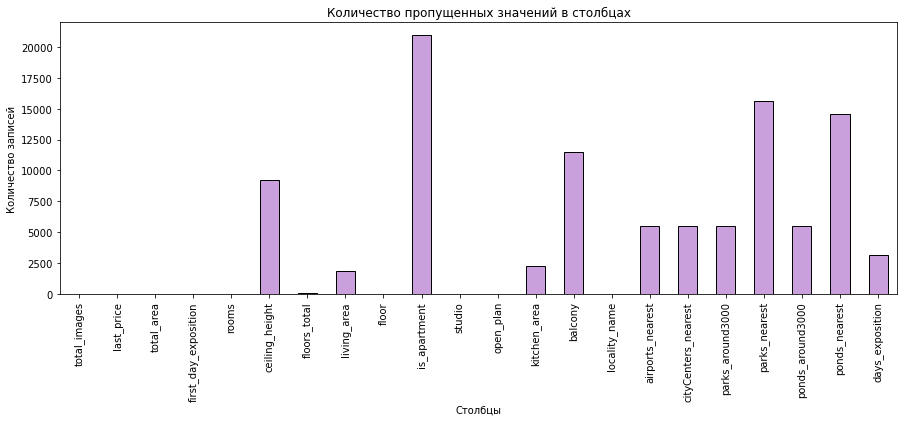

In [4]:
df.isna().sum().plot(kind='bar', title='Количество пропущенных значений в столбцах',
                     figsize=(15, 5), color='#c9a0dc',  ec='black',)
plt.ylabel('Количество записей')
plt.xlabel('Столбцы')
plt.show()

Пропусков много, больше, чем в половине столбцов. Посмотрим в процентном соостношении:

In [5]:
df.isna().mean()
#процент пропусков

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Лидеры по содержанию пропусков: is_apartment, parks_nearest, ponds_nearest, ceiling_height и balcony.

### Проверка на дубли

Мы видим, что столбцов с пропусками не мало. При этом, есть столбцы, в которых пропусков немного в процентном соотношении - 2-9%, но есть и такие, где пропуском много - 20-80%. Для того, чтобы понять, что с этими пропусками сделать, нужно рассмотреть столбцы по отдельности.


Рассмотрим уникальные значения по всем колонкам, узнаем есть ли дубли и заодно, глядя на значения, решим, что делать с пропуками:

Смотрим столбец "**airports_nearest**":

In [6]:
df['airports_nearest'].sort_values().unique()
#список уникальных значений

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

Теперь мы знаем, что в графе есть значения от 0 метров до 84869 и значение NAN.
Значение "0" скорее всего означает, что рядом нет аэропорта, параметр Nan скорее всего означает тоже самое, просто при заполнении клиенты/сотрудники по разному обозначили отсутсвие аэропорта. Заменим Nan на 0, будем считать их как один показатель.

In [7]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)
#меняем пропуски на 0
df['airports_nearest'].sort_values().unique()
#проверяем

array([    0.,  6450.,  6914., ..., 84665., 84853., 84869.])

Смотрим второй столбец "**balcony**":

In [8]:
df['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Каких-то аномальных значений нет, есть только пропуски. Вероятнее всего пропуски - это отсутсвие балконов и мы можем смело заменить их на "0":

In [9]:
df['balcony'] = df['balcony'].fillna(0)
#меняем пропуски на 0
df['balcony'].sort_values().unique()
#проверяем

array([0., 1., 2., 3., 4., 5.])

Пропуски удалены.

Переходим к третьему столбцу "**ceiling_height**":

In [10]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Есть пропуски и странные значения, например, 1 метр или 100 метров. Сложно представить потолки с такой высотой. По сведениям из интернета, высота потолков в жилых помещениях колеблется от 2 до 5 метров. Визуализируем данные для наглядности:

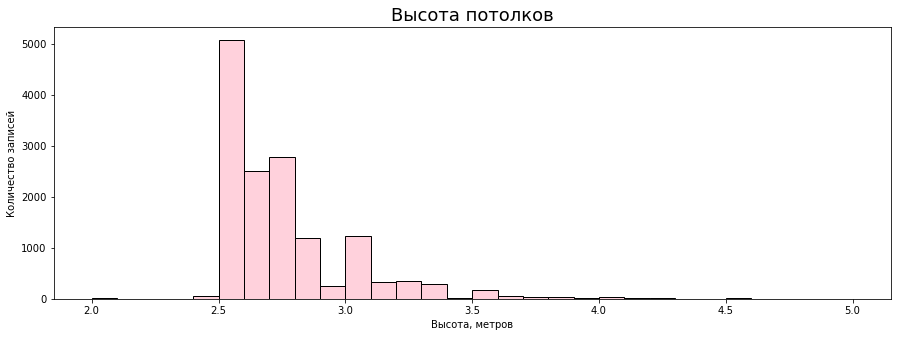

In [11]:
df['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist',
                                        bins=30, range=(2, 5), figsize=(15, 5), color='#ffd1dc',  ec='black')
plt.title('Высота потолков', fontsize=18)
plt.ylabel('Количество записей')
plt.xlabel('Высота, метров');

Судя по гистограмме и данным, основное распределение от 2,5 до 3,4 метров. 
Сильно низкие и высокие показатели - это аномалии, мы их удалим позднее.

Далее смотрим столбец "**cityCenters_nearest**":

In [12]:
df['cityCenters_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [13]:
df['cityCenters_nearest'].isnull().sum()

5519

Количество пропусков не маленькое, на что их заменить - не понятно, оставляем, как есть.

Следующий столбец - "**days_exposition**":

In [14]:
df['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

Следующий столбец "**first_day_exposition**":

In [15]:
df['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00', '2014-11-29T00:00:00',
       '2014-12-04T00:00:00', ..., '2019-05-01T00:00:00',
       '2019-05-02T00:00:00', '2019-05-03T00:00:00'], dtype=object)

Пропусков нет, формат столбца меняем на читаемый:

In [16]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Следующий столбец "**floor**":

In [17]:
df['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

Пропусков нет, аномалий также не наблюдается.

Дальше смотрим столбец "**floors_total**":

In [18]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

По данному столбцу аномальных значений не наблюдается, но имеется около 0,3% пропусков. Значение совсем маленькое, а с этими данными нам еще работать, поэтому просто удалим их.

In [19]:
df.dropna(subset=["floors_total"],inplace = True,axis = 0 )
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

Следующий столбец "**is_apartment**":

In [20]:
df['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

В данном столбце больше всего пропусков, около 88%. Можно предположить, что это связано с тем, что пункт к запонению не обязателен, а оформление жилого помещения как "аппартаменты" в России встречается не так часто. Скорее всего клиенты не заполняли данный пункт, так как у них не аппартаменты. Заменим пустые значения на False, а тип данных изменим на булев:

In [21]:
df['is_apartment'] = df['is_apartment'].where(~df['is_apartment'].isnull(), False)
df['is_apartment'].sort_values().unique()
df['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23613, dtype: bool

Следующий столбец "**kitchen_area**":

In [22]:
df['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Посмотрим распределение:

In [23]:
df['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальная величина - 1,3 метра, максимальная - 112. Оба значения не кажутся реальными.

Согласно "СП 54.13330.2016, Здания жилые многоквартирные" минимальная площадь кухни - 5 метров, максимальным же числом могут быть разные значения. При поиске в интернете встречаются варианты квартир с кухней-гостинной 50-60 квадратных метров. Посмотрим, сколько значений не укладываются в эти значения. За нижнюю границу возьмем 4 метра, за верхнюю - 70:

In [24]:
len(df[df['kitchen_area'] < 4])

28

In [25]:
len(df[df['kitchen_area'] > 70])

11

Удалим совсем выбивающиеся значения: меньше 4 метров (28 строк) и больше 70 метров (11 строк). По большей вероятности, это ошибочные данные и на что их заменить мы точно не можем знать, а пропуски заполним медианой:

In [26]:
df.drop(df[df['kitchen_area'] > 70].index, inplace=True)  
df.drop(df[df['kitchen_area'] < 4].index, inplace=True) 
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].sort_values().unique()

array([ 4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.8 ,
        4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,  5.2 ,  5.21,  5.23,
        5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,  5.35,  5.4 ,  5.42,
        5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,  5.6 ,  5.61,  5.62,
        5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,  5.78,  5.8 ,  5.82,
        5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,  6.03,  6.1 ,  6.16,
        6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,  6.26,  6.27,  6.28,
        6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,  6.4 ,  6.47,  6.5 ,
        6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,  6.7 ,  6.72,  6.73,
        6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,  6.86,  6.9 ,  6.91,
        6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,  7.09,  7.1 ,  7.12,
        7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,  7.36,  7.4 ,  7.41,
        7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,  7.7 ,  7.71,  7.78,
        7.8 ,  7.84,  7.85,  7.86,  7.87,  7.89,  7.9 ,  7.92,  7.94,
        7.95,  7.97,

Явно аномальные значения удалены, пропуски заполнены медианой.

Далее рассмотрим столбец "**last_price**":

In [27]:
df['last_price'] = df['last_price'].astype('int64')
#для удобства заменим тип на int
df['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 330000000, 401300000,
       763000000], dtype=int64)

Очевидных аномалий нет, пропусков тоже.

Следующий у нас столбец "**living_area**":

In [28]:
df['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 332. , 347.5,   nan])

Есть пропуски (около 8%), трогать их не будем. Также есть подозрения на аномальные значения (2 метра), но так как мы не знаем точно ошибка ли это, трогать их не будем. 

Смотрим столбец "**locality_name**":

In [29]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Есть пропущенные значения, около 2%. Менять мы их не будем, удалять тоже. Не факт, что они как-то смогут повлиять на дальнейший анализ. Вероятно, в редких случаях продавцы не указывают название, думая, что если город СПБ, то это и так понятно.

Переходим к "**open_plan**":

In [30]:
df['open_plan'].sort_values().unique()

array([False,  True])

Пропусков нет, зщанчения булевы, тип соответсвует.

Далее "**parks_around3000**":

In [31]:
df['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Вероятнее всего пропуски означают "0" парков, поэтому заменим Nan на "0"

In [32]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

Смотрим столбец "**parks_nearest**":

In [33]:
df['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     31
          ..
873.0      1
859.0      1
1150.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 994, dtype: int64

Аномальных значений не видно, есть пропуски и они скорее всего означают, что рядом нет парка, оставим все, как есть.

Далее "**ponds_around3000**":

In [34]:
df['ponds_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Есть пропуски, заменим их нулем, так как скорее всего они означают, что водоема рядом нет:

In [35]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

Смотрим столбец "**ponds_nearest**":

In [36]:
df['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

Очевидно аномальных значений нет, есть пропуски, но мы их не будем заполнять. Вероятнее всего, пропуски по причине отсутствия водоема поблизости или же продавец просто не знает расстояние до ближайшего водоема, либо данные не выгрузились.

Следующий столбец "**rooms**":

In [37]:
df['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16, 19],
      dtype=int64)

Пропусков нет. Есть подозрения на аномальные значения: 0 - но это могут быть, например, студии, или же 19 - но теоретически, в элитных квартирах могут быть очень разные планировки, а также это может быть и коммунальная квартира или доходный дом. Поэтому исправлять ничего тут не будем, оставим как есть.

Смотрим столбец "**studio**":

In [38]:
df['studio'].sort_values().unique()

array([False,  True])

Тут все в порядке: значения булевый, тип данных соответствующий.

Следующий столбец "**total_area**":

In [39]:
df['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 618. , 631. , 631.2])

Пропусков нет, значения в норме, аномалий не заметно.

Наконец, последний столбец "**total_images**":

In [40]:
df['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

Тут тоже все в порядке, пропусков нет.


Со столбцами закончили, осталось привести в порядок названия колонок и проверить данные на явные дубликаты:

### Проверка на явные дубликаты и корректность названия колонок

Выведем общий список колонок:

In [41]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Нужно привести три названия к змеиному регистру: 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000':

In [42]:
df = df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest',
               'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия колонок исправлены, ищем дубликаты:

In [43]:
df.duplicated().sum()
# подсчёт явных дубликатов

0

Дубликатов нет, пропущенные значения в колонках исправлены, где это было целесообразно, явные аномалии также исправлены. Данные готовы к анализу.

### Вывод по главе

При рассмотрении данных были обнаружены пропуски (от 2 до 80 процентов), а также столбцы с некорректными типами данных. Пропуски были заполнены там, где это допустимо (в столбцах наличия балконов и наличия аэропорта рядом), формат изменен на числовой для удобства дальнейшей работы. 

## Расчёты и добавление результатов в таблицу

### Добавление данных о цене квадратного метра, дня недели, месяца и года публикации

Посчитаем и добавим в таблицу цену квадратного метра:

In [44]:
#посчитаем цену квадратного метра
df['price_per_square_meter'] = df['last_price'] / df['total_area']

#для удобства просмотра приведем к типу int
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785


Добавляем в таблицу день недели, месяц и год публикации объявления:

In [45]:
#столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

#столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

#столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

#проверяем
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015


Готово, переходим к категоризации.

### Добавление категоризации этажей и соотношения площадей внутри квартир

Категоризируем этажи квартир:

In [46]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
 
df['floor_category'] = df.apply(floor_category, axis = 1)

#проверяем
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой


Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [47]:
#соотношение жилой плозади к общей
df['useful_area_ratio'] = df['living_area'] / df['total_area']

#соотношение площади кухни к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

#проверяем
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214


### Изучение параметров квартир

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

**Площадь**:

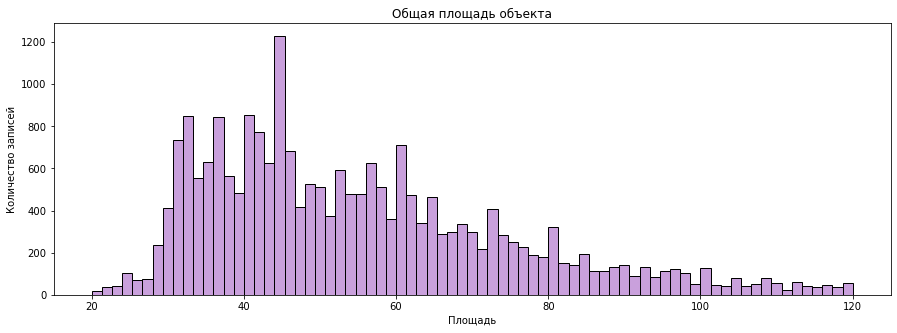

In [48]:
ax = df['total_area'].plot(kind='hist', bins=75, range=(
    20, 120), title='Общая площадь объекта', figsize=(15, 5), color='#c9a0dc',  ec='black')
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество записей');

Построим ящик с усами, чтобы посмотреть есть ли выбросы в данных по площади, а также распредение по квартилям, среднему и медиане:

count    23574.000000
mean        60.267085
std         34.973256
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        631.200000
Name: total_area, dtype: float64

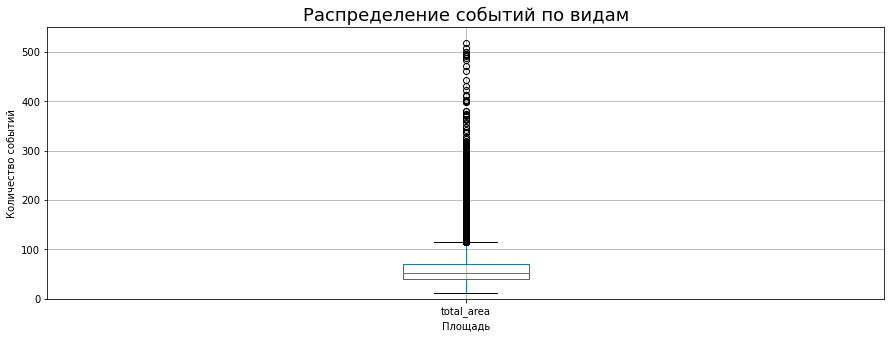

In [49]:
df.boxplot(column='total_area', figsize = (15, 5))
plt.ylim(0, 550)
plt.title('Распределение событий по видам', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Площадь');

df['total_area'].describe()

Основная масса распределена, в основном, между 30 и 75 метрами. Также есть "аномалии", площадь которых больше 300 метров и выбросы больше 600. Удалять их не будем, так как хоть и не часто, но такой метраж встречается в элитной недвижимости в Питере. 
Пик продаж приходится на площадь 45 метров, следующие всплески с 30 до 35 метров, а также с 50 до 65 метров. Остальной метраж уже пользуется меньшей популярностью.

**Цена**:

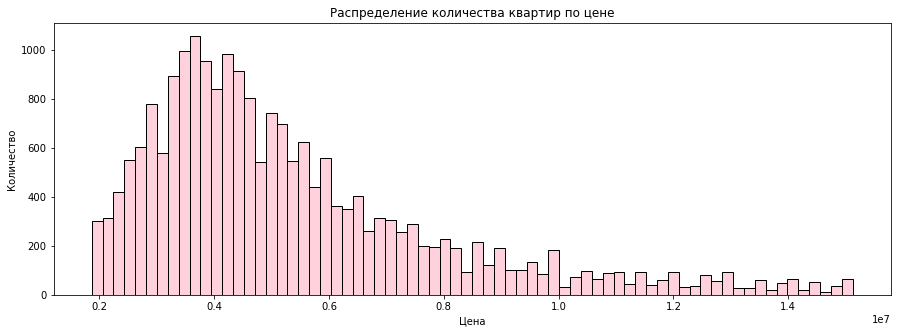

In [50]:
ax = df['last_price'].plot(kind='hist', bins=70, range=(
    1867000, 15122879), title='Распределение количества квартир по цене', figsize = (15, 5), color = '#ffd1dc',  ec='black')
ax.set_xlabel('Цена')
ax.set_ylabel('Количество');

Построим ящик с усами, чтобы посмотреть есть ли выбросы в данных по цене, а также распредение по квартилям, среднему и медиане:

count    2.357400e+04
mean     6.499888e+06
std      1.047807e+07
min      1.219000e+04
25%      3.413500e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

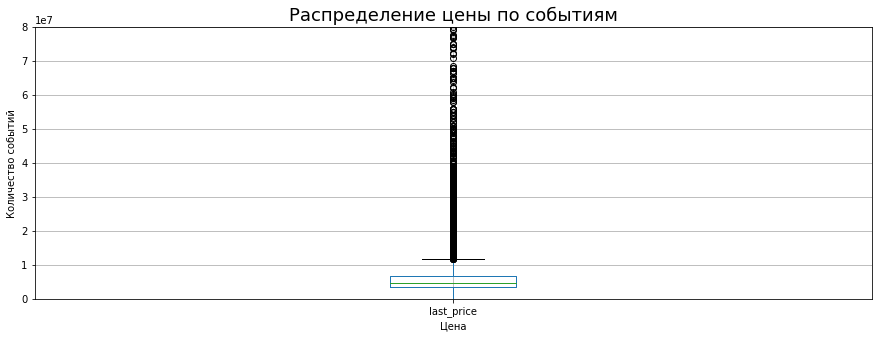

In [51]:
df.boxplot(column='last_price', figsize = (15, 5))
plt.ylim(-100, 80000000);
plt.title('Распределение цены по событиям', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Цена');

df['last_price'].describe()

Основное распределение между 2 млн и 6,5 млн, далее идет медленный спад спроса на квартиры в зависимости от увеличения цены.
Пик спроса на квартиры от 3,5 млн до 4,5 млн.
Есть выбросы более 12 млн., скорее всего это элитное жилье.

**Количество комнат**:

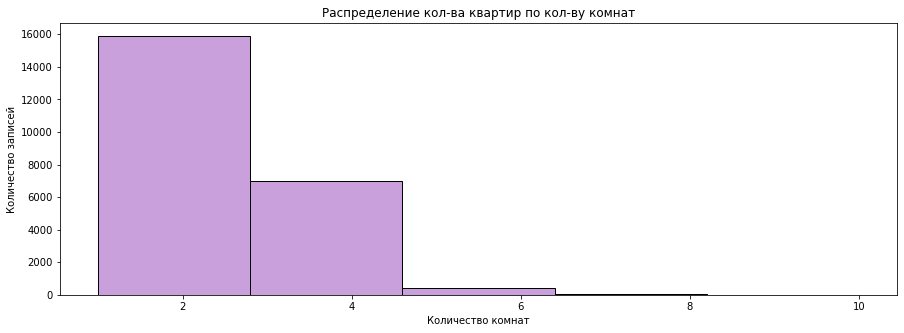

In [52]:
ax = df['rooms'].plot(kind='hist', bins=5, range=(1,10), title='Распределение кол-ва квартир по кол-ву комнат', 
                      figsize = (15, 5), color = '#c9a0dc',  ec='black')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество записей');

Построим ящик с усами, чтобы посмотреть есть ли выбросы в данных по комнатам, а также распредение по квартилям, среднему и медиане:

count    23574.000000
mean         2.070629
std          1.073378
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

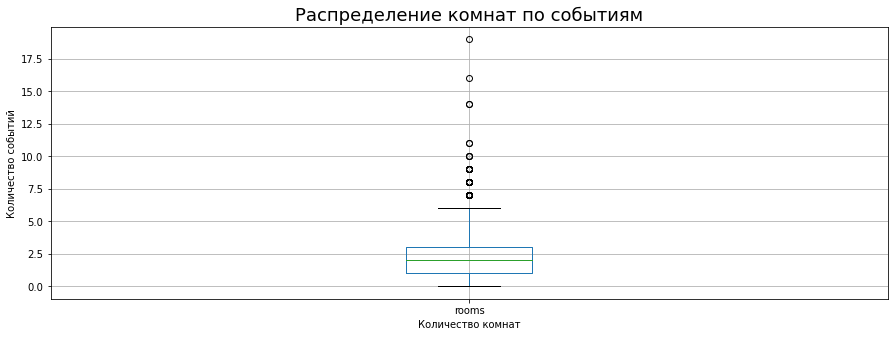

In [53]:
df.boxplot(column='rooms', figsize = (15, 5))
plt.title('Распределение комнат по событиям', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Количество комнат');

df['rooms'].describe()

Чем больше комнат, тем меньше квартир. Самые полулярные - однокомнатные. Вторые по популярности - двухкомнатные. Далее - сильный спад.
Есть небольшое количество выбросов (от 6 до 19 комнат, удалять их не будем, так как такие квартиры могут встречаться, например, элитная недвижимость и коммунальные квартиры).

**Высота потолков**:

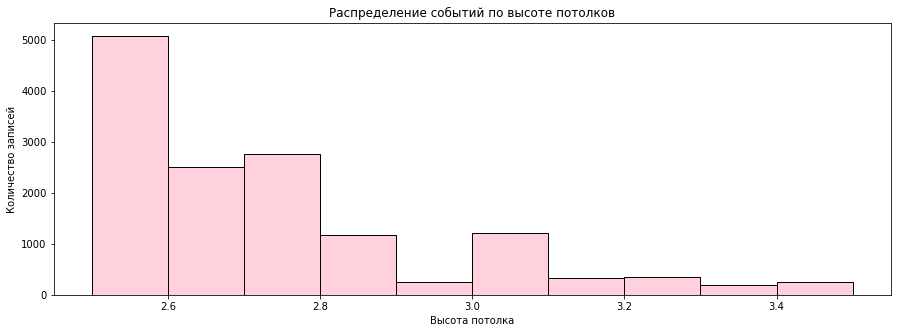

In [54]:
ax = df['ceiling_height'].plot(kind='hist', bins=10, range=(2.5,3.5), title='Распределение событий по высоте потолков', 
                               figsize = (15, 5), color = '#ffd1dc',  ec='black')
ax.set_xlabel('Высота потолка')
ax.set_ylabel('Количество записей');

Самая частовстречаемая выстота потолка - 2,6 метров. На втором месте - 2,5 - 2,8. 

Построим ящик с усами, чтобы посмотреть есть ли выбросы в данных по высоте потолков, а также распредение по квартилям, среднему и медиане:

count    14470.000000
mean         2.771296
std          1.262417
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

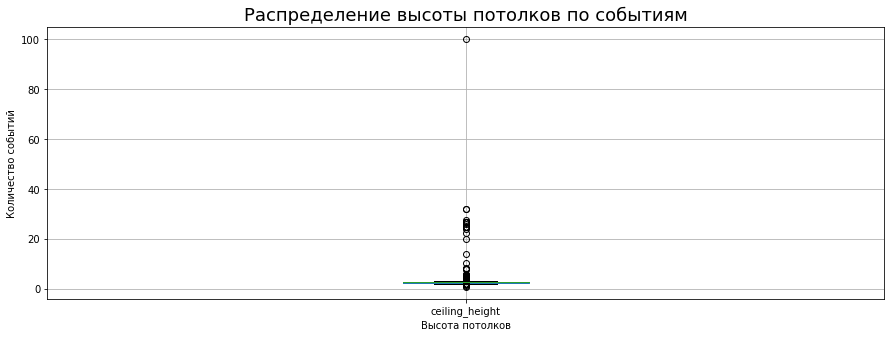

In [55]:
df.boxplot(column='ceiling_height', figsize = (15, 5));
plt.title('Распределение высоты потолков по событиям', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Высота потолков');

df['ceiling_height'].describe()

Для того, чтобы понять, какое количество строк с аномальными показателями, посчитаем строки, где высота ниже 2х метров и выше 5 метров:

In [56]:
len(df[df['ceiling_height'] > 5])

36

In [57]:
len(df[df['ceiling_height'] < 2]) 

3

36 и 3 строки, количество - маленькое, можно удалять, это меньше 1 тысячной процента.

In [58]:
df.drop(df[df.ceiling_height < 2].index, inplace=True)  
df['ceiling_height'].sort_values().unique()

array([  2.  ,   2.2 ,   2.25,   2.3 ,   2.34,   2.4 ,   2.45,   2.46,
         2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,   2.53,   2.54,
         2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,   2.61,   2.62,
         2.63,   2.64,   2.65,   2.66,   2.67,   2.68,   2.69,   2.7 ,
         2.71,   2.72,   2.73,   2.74,   2.75,   2.76,   2.77,   2.78,
         2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,   2.85,   2.86,
         2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,   2.93,   2.94,
         2.95,   2.96,   2.97,   2.98,   2.99,   3.  ,   3.01,   3.02,
         3.03,   3.04,   3.05,   3.06,   3.07,   3.08,   3.09,   3.1 ,
         3.11,   3.12,   3.13,   3.14,   3.15,   3.16,   3.17,   3.18,
         3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,   3.26,   3.27,
         3.28,   3.29,   3.3 ,   3.31,   3.32,   3.33,   3.34,   3.35,
         3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.43,   3.44,
         3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,   3.52,
      

In [59]:
df.drop(df[df.ceiling_height > 5].index, inplace=True)  
df['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

Аномалии удалены.

**Вывод**: 
 - Пик продаж приходится на площадь 45 метров, следующие всплески с 30 до 35 метров, а также с 50 до 65 метров. Остальной метраж уже пользуется меньшей популярностью;
 - Самые полулярные квартиры- однокомнатные. Вторые по популярности - двухкомнатные; 
 - Самая частовстречаемая выстота потолка - 2,6 метров. На втором месте - 2,5. 

### Изучение времени продажи квартир

Далее нам нужно изучить время продажи квартир. Для этого построим гистограмму и найдем среднее и медиану:

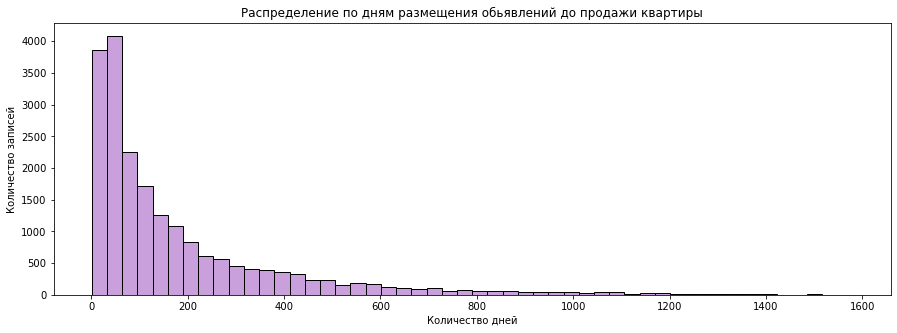

In [60]:
ax = df['days_exposition'].plot(kind='hist', bins=50, 
                                title='Распределение по дням размещения обьявлений до продажи квартиры', 
                                figsize = (15, 5), color = '#c9a0dc',  ec='black')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество записей');

Посмотрим с 1 по 100 день покрупнее:

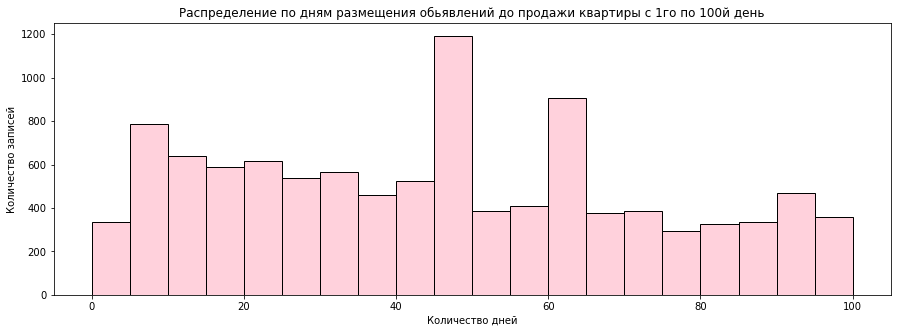

In [61]:
ax = df['days_exposition'].plot(kind='hist', bins=20, range=(0,100), 
                                title='Распределение по дням размещения обьявлений до продажи квартиры с 1го по 100й день', 
                                figsize = (15, 5), color = '#ffd1dc',  ec='black')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество записей');

Основная часть продаж с первых дней размещения объявления по примерно 100 день. Самый пик на первые 10 дней, а также небольшой всплеск на 50.

In [62]:
df['days_exposition'].describe()

count    20374.000000
mean       180.916168
std        219.751768
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 180 дней, медиана - 95.

Большая часть квартир продавалась примерно за 50 дней. Есть квартиры, которые продавались больше года (400-600 дней). Продаж после 600 совсем уже мало, а продажи после 800 выглядят выбросами. Построим ящик с усами, чтобы подробнее посмотреть на выбросы:

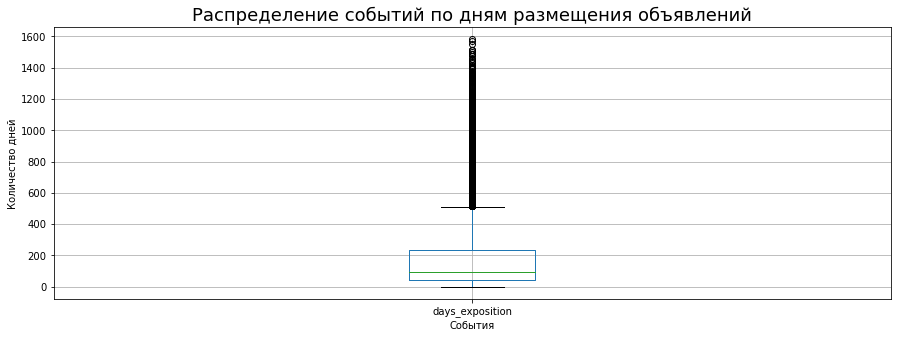

In [63]:
df.boxplot(column='days_exposition', figsize = (15, 5))
plt.title('Распределение событий по дням размещения объявлений', fontsize=18)
plt.ylabel('Количество дней')
plt.xlabel('События');

Значения после 500 можно смело не учитывать при анализе, это выбросы:


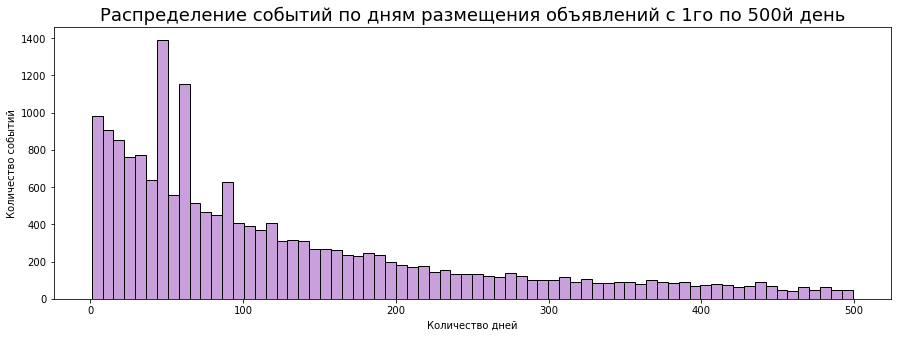

In [64]:
df.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(15,5), color = '#c9a0dc',  ec='black', grid = False)
plt.title('Распределение событий по дням размещения объявлений с 1го по 500й день', fontsize=18)
plt.ylabel('Количество событий')
plt.xlabel('Количество дней');

**Вывод**: большая часть продаж происходит за 50-60 дней, самый высокий пик - 45 день, второй - 60.
При этом, есть квартиры, которые продаются очень быстро (0-20 дней) и есть квартиры, продажа которых занимает очень длительное время (более года)





### Выявление зависимости цены от близости к центру

Посмотрим как близость ук центру города влияет на стоимость недвижимости:

,last_price
city_сenters_nearest_km,
0,2.219279e+07
1,1.889542e+07
2,1.619914e+07
3,1.352179e+07
4,1.326669e+07
5,1.504496e+07
6,1.413307e+07
7,1.143479e+07
8,8.434861e+06


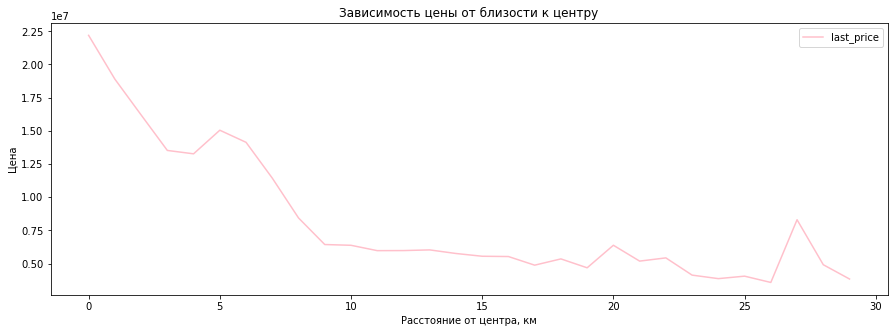

In [65]:
df['city_сenters_nearest_km'] = df['city_сenters_nearest']/1000
df['city_сenters_nearest_km'] = df['city_сenters_nearest_km'].fillna(999999)
df['city_сenters_nearest_km'] = df['city_сenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km !=999999').pivot_table(
    index='city_сenters_nearest_km', values='last_price', aggfunc='mean')
pivot_table_km.plot(title='Зависимость цены от близости к центру', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Цена')
plt.xlabel('Расстояние от центра, км');
pivot_table_km

Зависимость видна, чем ближе к центру, тем цена выше.

### Выявление зависимости продаж от дня/месяца/года

Дальше посмотрим дату: день, месяц, год.

**День недели**:

,mean,count,median
weekday_exposition,,,
1,6.336532e+06,4156,4714595
2,6.498523e+06,3941,4700000
0,6.487410e+06,3586,4650000
3,6.643741e+06,4272,4650000
4,6.316002e+06,3972,4562500
5,6.983464e+06,1920,4550000
6,6.243318e+06,1688,4550000


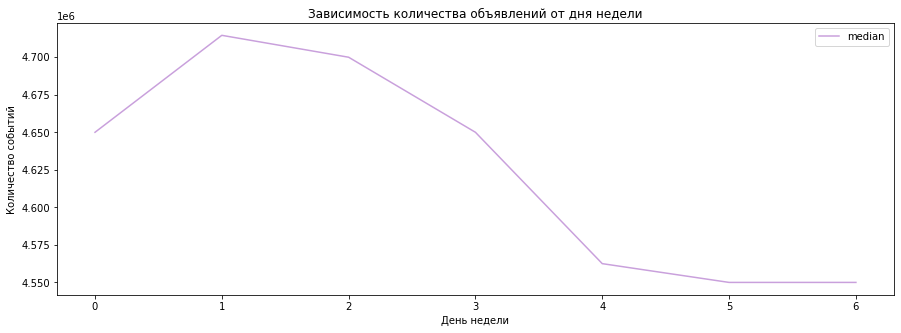

In [66]:
pivot_table_weekday_exposition = df.pivot_table(
    index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y='median', title='Зависимость количества объявлений от дня недели', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Количество событий')
plt.xlabel('День недели');

pivot_table_weekday_exposition.sort_values('median', ascending=False)

Пик приходится на вторник и среду, а с пятницы по воскресенье - спад. Возможно это связано с тем, что на буднях объявления скорее всего выкладывают агенства (в рабочие дни), а по выходным частные лица и цена уних чуть меньше, чем у агенств с наценкой.

**Месяц**:

,mean,count,median
month_exposition,,,
4,6.686520e+06,2357,4800000
9,6.837675e+06,1969,4700000
11,6.416259e+06,2359,4700000
12,6.716288e+06,1635,4700000
2,6.406935e+06,2626,4650000
3,6.367907e+06,2571,4650000
7,6.548640e+06,1680,4650000
1,6.595256e+06,1493,4600000
8,6.356767e+06,1733,4590000


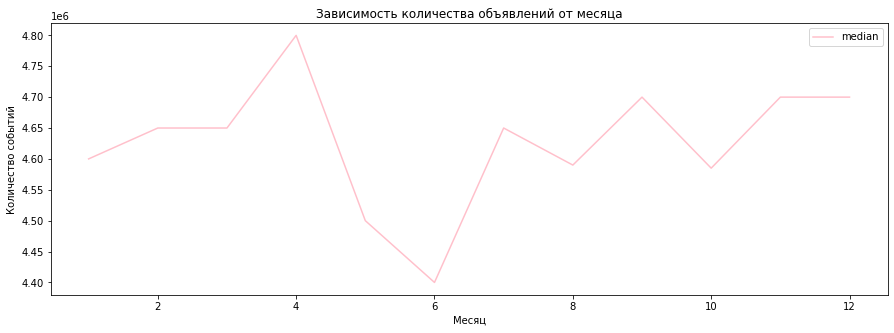

In [67]:
pivot_table_month_exposition = df.pivot_table(
    index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y='median', title='Зависимость количества объявлений от месяца', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Количество событий')
plt.xlabel('Месяц');

pivot_table_month_exposition.sort_values('median', ascending=False)

Тут видна сезонность. Летом, особенно вначале, спрос на квартиры меньше, так как люди больше отдыхают на природе и уезжают в отпуска. Пик - апрель.

**Год**:

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.409388e+06,1178,5300000
2019,6.766507e+06,2860,5050000
2018,5.930662e+06,8468,4572500
2016,6.830479e+06,2760,4540000
2017,6.472943e+06,8132,4500000


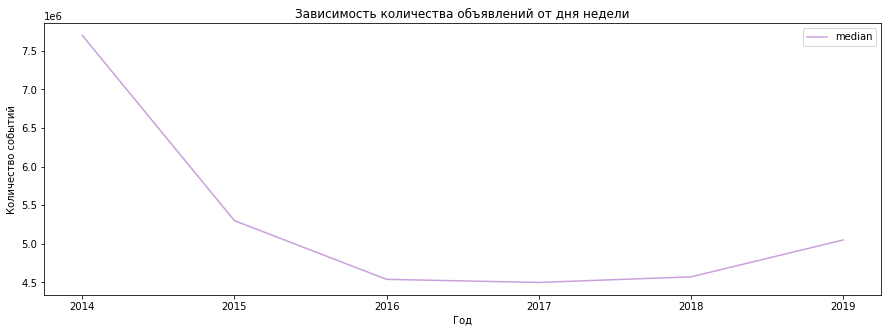

In [68]:
pivot_table_year_exposition = df.pivot_table(
    index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y='median', title='Зависимость количества объявлений от дня недели', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Количество событий')
plt.xlabel('Год');

pivot_table_year_exposition.sort_values('median', ascending=False)

На графике мы наблюдаем провал с 2015 по 2017 год, с 2018 опять начинается рост. 
Причина может быть в экономическом кризисе 2014-2015 годов, который на время ухудшил экономическую обстановку в стране и уменьшил покупательскую способность на квартиры.


### Изучение влияния на цену площади квартир, числа комнат и этажности

Рассмотрим влияние на цену следующих параметров: этаж, площадь, число комнат.

**Влияние этажа**:

,mean,count,median
floor_category,,,
другой,6.640970e+06,17310,4850000
последний,7.137325e+06,3319,4300000
первый,4.811210e+06,2906,3900000


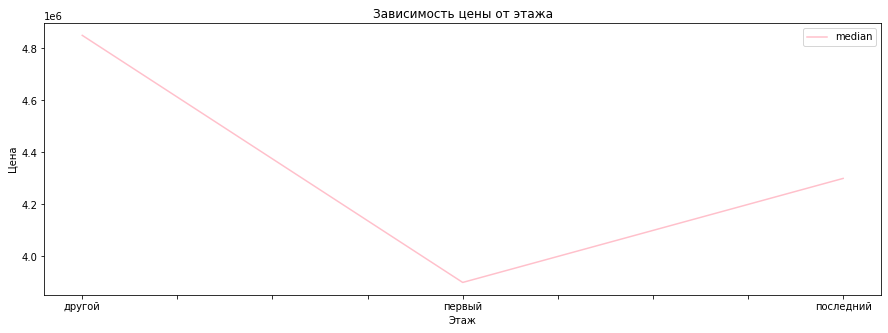

In [69]:
table = df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
table.columns = ['mean', 'count', 'median']
table.plot(y = 'median', title='Зависимость цены от этажа', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Цена')
plt.xlabel('Этаж');

table.sort_values('median', ascending = False)

In [70]:
print('Коэффициент корреляции для этажа:')
df['floor'].corr(df['last_price']).round(2)

Коэффициент корреляции для этажа:


0.02

Четкой корреляции увеличения цены от увеличения этажа нет. Мы видим, что самая популярная категория этажа - другой, на втором месте - последний. Первый же этаж спросом не пользуется, цена на квартиры на первом этаже ниже всего.

**Влияние площади**:

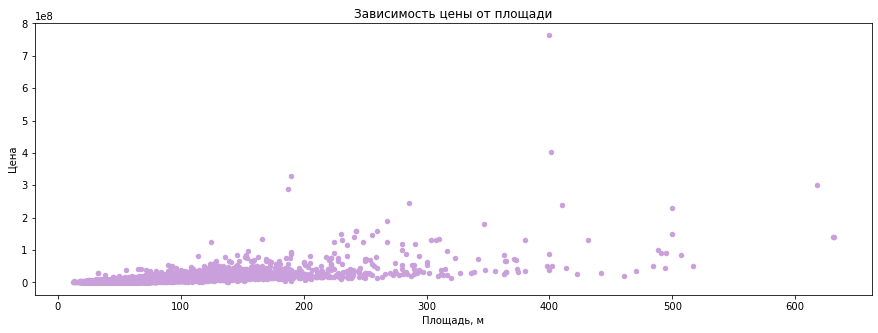

In [71]:
#Влияние площади на цену
df.plot(x='total_area', y='last_price', kind='scatter', title='Зависимость цены от площади', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Цена')
plt.xlabel('Площадь, м'); 

In [72]:
print('Коэффициент корреляции для площади:')
df['total_area'].corr(df['last_price']).round(2)

Коэффициент корреляции для площади:


0.64

Мы видим положительную корреляцию - 0,64. По градации значений коэффициента корреляции Пирсона это значение считается "заметной" корреляцией. Связь показателей на графике заметна до площади примерно в 300 метров, далее она пропадает.

**Влияние количества комнат**:

,mean,count,median
rooms,,,
19,3.225000e+07,1,32250000
16,2.850000e+07,1,28500000
14,2.682950e+07,2,26829500
11,2.525000e+07,2,25250000
7,5.147007e+07,59,24900000
9,3.415236e+07,8,23750000
8,5.022417e+07,12,23095000
10,2.616667e+07,3,23000000
6,3.154323e+07,103,19000000


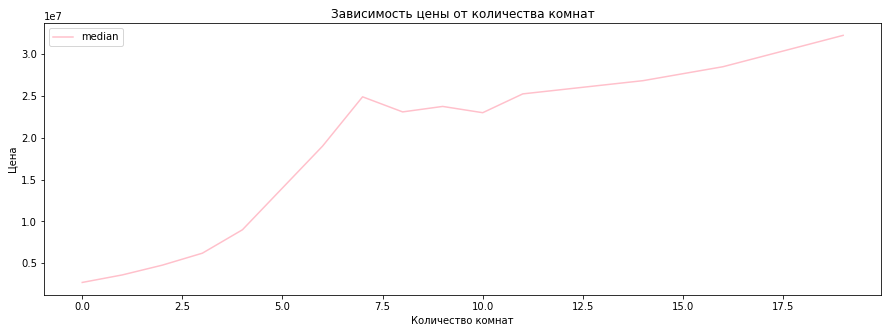

In [73]:
table_2 = df.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'], )
table_2.columns = ['mean', 'count', 'median']
table_2.plot(y = 'median', title='Зависимость цены от количества комнат', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Цена')
plt.xlabel('Количество комнат');

table_2.sort_values('median', ascending = False)

Чем больше комнат, тем больше цена. Тут все предсказуемо.

### Изучение влияния города на цену

Рассмотрим влияние города на цену:

In [74]:
locality_name_sorted_pivot_table = (df
                                    .pivot_table(index = 'locality_name',
                                                     values = ["last_price"],
                                                     aggfunc = ["count","mean"]))   

locality_name_sorted_pivot_table.columns = ["count","mean"]

locality_name_sorted_pivot_table.sort_values(by = "count",inplace = True,ascending = False)


locality_name_sorted_pivot_table = locality_name_sorted_pivot_table[:10]

locality_name_sorted_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15593,7.981878e+06
посёлок Мурино,516,3.674631e+06
посёлок Шушары,439,4.109809e+06
Всеволожск,398,3.789068e+06
Пушкин,368,6.480637e+06
Колпино,338,3.964021e+06
посёлок Парголово,327,4.488075e+06
Гатчина,306,3.487972e+06
деревня Кудрово,299,4.234158e+06


Цена зависит от города: самая высокая в Санкт-Петербурге, самая низкая - в Выборге.

Далее рассмотрим квартиры в СПБ, выделим центр:

,last_price
city_сenters_nearest_km,
0,2.219279e+07
1,1.889542e+07
2,1.619914e+07
3,1.352179e+07
4,1.326669e+07
5,1.504496e+07
6,1.413307e+07
7,1.143479e+07
8,8.434861e+06


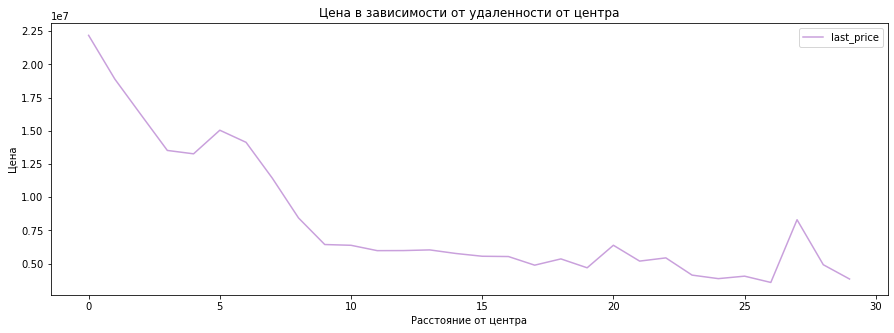

In [75]:
df['city_сenters_nearest_km'] = df['city_сenters_nearest']/1000
df['city_сenters_nearest_km'] = df['city_сenters_nearest_km'].fillna(999999)
df['city_сenters_nearest_km'] = df['city_сenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km !=999999').pivot_table(
    index='city_сenters_nearest_km', values='last_price', aggfunc='mean')
pivot_table_km.plot(title='Цена в зависимости от удаленности от центра', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Цена')
plt.xlabel('Расстояние от центра');
pivot_table_km

После 5 км цена идет на спад. Возьмем за центр радиус в 8 км.
Выделим сегмент с этим радиусом:

                         rooms     floor  city_сenters_nearest  last_price
rooms                 1.000000 -0.051894             -0.186973    0.315516
floor                -0.051894  1.000000              0.250480    0.100620
city_сenters_nearest -0.186973  0.250480              1.000000   -0.061942
last_price            0.315516  0.100620             -0.061942    1.000000


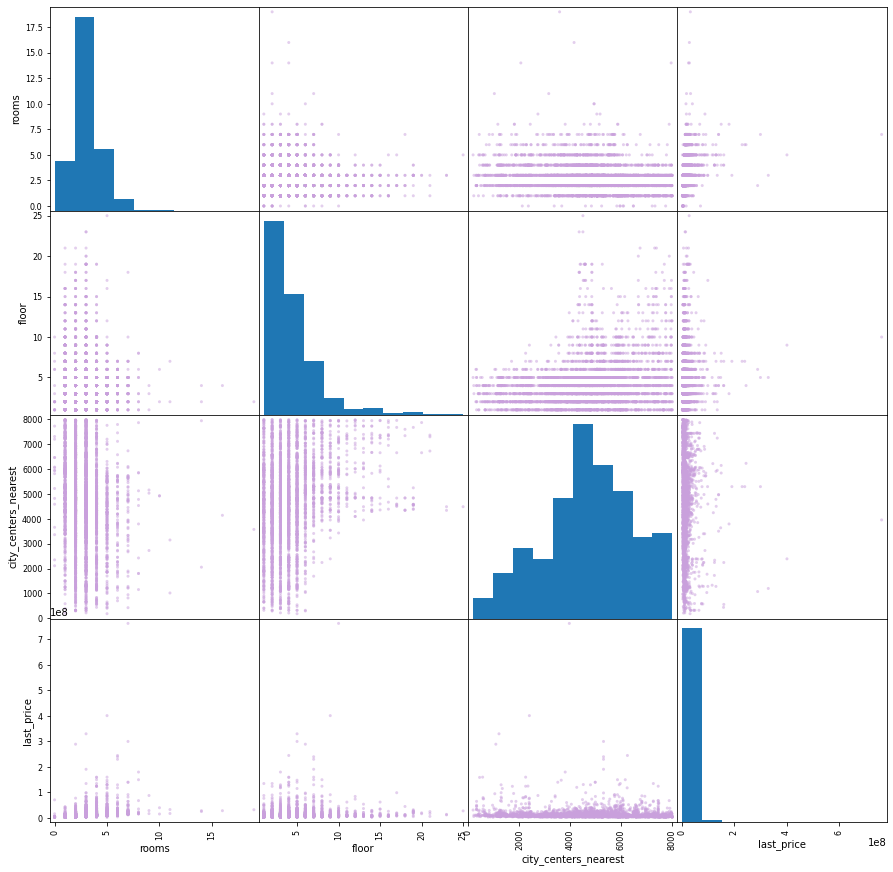

In [76]:
in_cityCenter = df.query('city_сenters_nearest_km < 8')
center_spb_data = df.query(
    'city_сenters_nearest_km <= 8 and locality_name == "Санкт-Петербург"')
print(in_cityCenter[['rooms',
                     'floor',
                     'city_сenters_nearest',
                     'first_day_exposition',
                     'last_price']].corr())

pd.plotting.scatter_matrix(in_cityCenter[['rooms',
                                          'floor',
                                          'city_сenters_nearest',
                                          'first_day_exposition',
                                          'last_price']], figsize=(15, 15), color = '#c9a0dc');

Сильнее всего на цену влияет количество комнат, совсем немного этаж, а удаленность от центра в центральном округе уже практически не влияет на стоимость.

**Влияние этажа**:

,mean,count,median
floor_category,,,
другой,1.343770e+07,3154,9000000
последний,1.670430e+07,723,8990000
первый,8.766471e+06,464,6300000


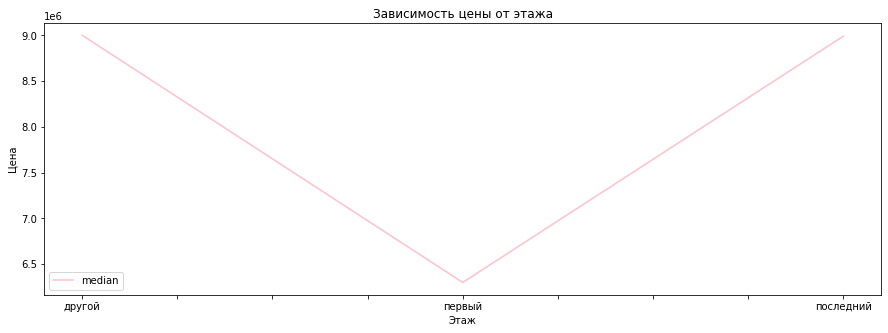

In [77]:
table_3 = center_spb_data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
table_3.columns = ['mean', 'count', 'median']
table_3.plot(y = 'median', title='Зависимость цены от этажа', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Цена')
plt.xlabel('Этаж');
table_3.sort_values('median', ascending = False)

Этаж имеет значение. На первом этаже квартиры дешевле, чем на последнем и других этажах, как и в общей выборке.

**Влияние растояния от центра**:

-0.11060504730999539

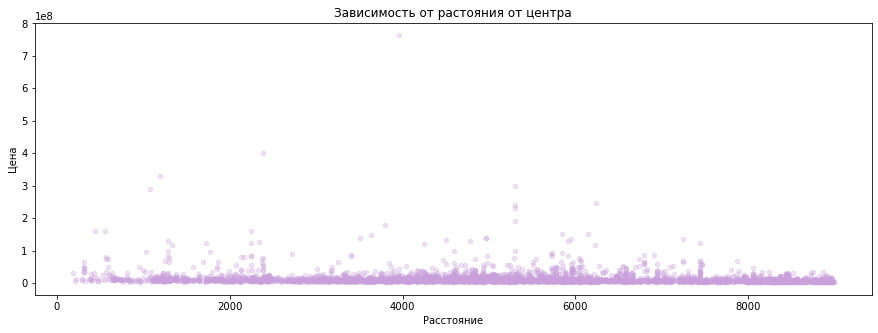

In [78]:
center_spb_data.plot(kind='scatter', y='last_price', x='city_сenters_nearest', alpha=0.3, title='Зависимость от растояния от центра',
                     figsize=(15, 5), color='#c9a0dc')
plt.ylabel('Цена')
plt.xlabel('Расстояние');

center_spb_data['city_сenters_nearest'].corr(center_spb_data['last_price'])

Тут распределение достаточно ровное, так как у нас уже стоит выборка по центральном району.

**Влияние дня недели размещения объявления**:

,mean,count,median
weekday_exposition,,,
0,1.353406e+07,657,9000000
6,1.398180e+07,257,8970000
2,1.315444e+07,741,8780000
3,1.328327e+07,889,8700000
4,1.301770e+07,730,8500000
1,1.261193e+07,743,8400000
5,1.732196e+07,324,8225000


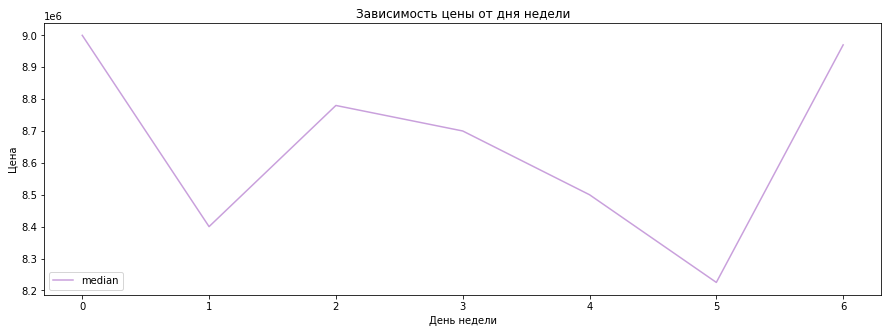

In [79]:
center_spb_weekday_exposition = center_spb_data.pivot_table(
    index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y='median', title='Зависимость цены от дня недели', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Цена')
plt.xlabel('День недели');

center_spb_weekday_exposition.sort_values('median', ascending=False)

Пик приходится на понедельник и воскресенье, спад во вторник и субботу.

**Зависимость стоимости квадратного метра от месяца размещения объявления**:

,mean,count,median
month_exposition,,,
9,1.450184e+07,386,9150000.0
11,1.300119e+07,426,9000000.0
3,1.335963e+07,470,8960822.5
7,1.345593e+07,346,8950000.0
1,1.414365e+07,269,8900000.0
2,1.355179e+07,457,8840000.0
5,1.332367e+07,257,8700000.0
8,1.288954e+07,321,8600000.0
6,1.327424e+07,337,8500000.0


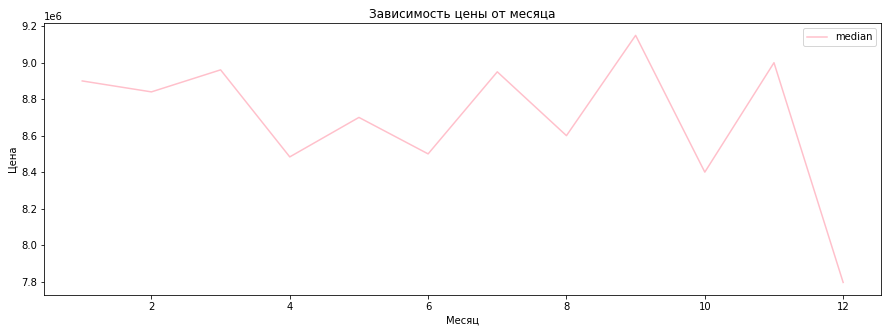

In [80]:
center_spb_month_exposition = center_spb_data.pivot_table(
    index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y='median', title='Зависимость цены от месяца', 
                                figsize = (15, 5), color = 'pink')
plt.ylabel('Цена')
plt.xlabel('Месяц');
center_spb_month_exposition.sort_values('median', ascending=False)

Самый пик цены приходится на сентябрь, небольшой спад март-июнь, самый большой спад в декабре перед новым годом. Просматривается сезонность в продажах.

**Влияние года размещения объявления**:

,mean,count,median
year_exposition,,,
2015,1.566136e+07,363,9800000
2016,1.465732e+07,588,9200000
2019,1.397213e+07,482,8870000
2017,1.365807e+07,1534,8549000
2018,1.174598e+07,1336,8490000


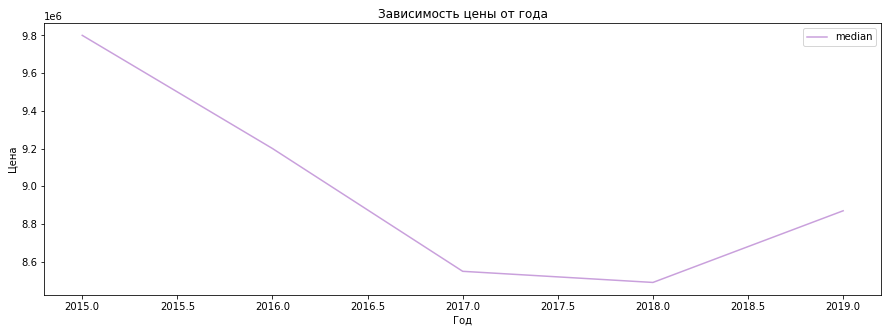

In [81]:
center_spb_year_exposition = center_spb_data.pivot_table(
    index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y='median', title='Зависимость цены от года', 
                                figsize = (15, 5), color = '#c9a0dc')
plt.ylabel('Цена')
plt.xlabel('Год');
center_spb_year_exposition.query(
    'count > 50').sort_values('median', ascending=False)

По графику мы видим падение цены начиная с 2015 по 2018 год, затем цена начинает резко повышаться. Ситуация в Питере схожая с общими данными.

### Вывод по главе

Цена зависит от города: самая высокая в Санкт-Петербурге, самая низкая - в Выборге.
Высокая цена держится примерно в 5-8 км от центра, этот радиус мы и выделили для анализа центральной части СПБ.
Сильнее всего на цену влияет количество комнат, совсем немного этаж, а удаленность от центра в центральном округе уже практически не влияет.
Самые дешевые квартиры на первом этаже, далее по стимости - последний, самая высока в категории - другой этаж.
Пик продаж по дням выпадает на понедельник и воскресенье, спад на вторник и субботу.
Самый пик цены приходится на сентябрь, небольшой спад апрель-июнь, самый большой спад в декабре перед новым годом. Просматривается сезонность в продажах.
Также мы выявили колебание цены по годам: падение цены начиная с 2015 по 2018 год, затем цена начинает резко повышаться. 

## Общий вывод

**В ходе работы были проделаны следующие шаги:**

  - Мы ознакомились с данными и подготовили их для дальнейшего анализа (привели в порядок названия колонок, убрали аномалии и заполнили пропуски, где это было возможно, проверили наличие дубликатов и изменили типы данных, там, где это было необходимо для удобства чтения); 
  - Добавили в таблицу необходимые данные (день недели, месяц и год публикации объявления, цену квадратного метра, соотношение жилой и общей площади, а также отношение площади кухни к общей);
  - Категоризировали этажи;
  - Изучиили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра;
  - Изучили время продажи квартир и его зависимость от близости к центру, а также от дня/месяца/года размещения объявления;
  - Изучили связь цены от города продажи;
  - Рассмотрели взаимосвязи на примере Санкт-Петербурга (выделили центральную зону и посмотрели, что сильнее всего влияет на цену в этой зоне).

**Вывод по общим данным**: 
 - Пик продаж приходится на площадь 45 метров, следующие всплески с 30 до 35 метров, а также с 50 до 65 метров. Остальной метраж уже пользуется меньшей популярностью;
 - Самые полулярные квартиры- однокомнатные. Вторые по популярности - двухкомнатные; 
 - Самый высокий спрос на квартиры стоимостью 3,5 - 4,5 млн рублей;
 - Самые частопокупаемые квартиры с выстотой потолка - 2,6 метров. На втором месте - 2,5; 
 - Основная часть продаж в первые 45-60 дней после размещения объявления; 
 - Чем ближе к центру, тем дороже;
 - Есть сезонность в продаже квартир (пик - апрель, август, спад - май-июнь);
 - По годам есть спад с 2015 по 2017 годы, после наблюдается устойчивый рост;
 - Цена зависит от города (Самый дорогой - Санкт-Петербург, самый недорогой - Выборг).

**Вывод по центру Санкт-Петербургу (центральная часть)**: 
 - Как центральную часть мы выделили радиус 8 км основываясь на цены в зависимости от удаленности от центра;
 - Сильнее всего на цену влияет количество комнат, совсем немного этаж и удаленность от центра в центральном округе уже практически не влияет на стоимость;
 - На первом этаже квартиры дешевле, чем на последующих, как и в общей выборке;
 - В пределах центральной зоны связь между удаленностью от центра и ценой - слабая, так как все квартиры выборки расположены в центральном районе;
 - Также наблюдается сезонность в продажах (пик - сентябрь и ноябрь, спад - апрель-июнь. Самый сильный спад в декабре перед Новым годом);
 - Как и в общей выборке наблюдается падение цен с 2015 года по 2018, далее начинается устойчивый рост.